In [1]:
# notwendige Bibliotheken importieren
import pandas as pd
# Configure display options
pd.set_option("display.max_columns", None)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
#%matplotlib
import seaborn as sns
sns.set_theme(style="whitegrid")
from datetime import datetime
from dateutil import tz

In [2]:
# Trainingsdaten in einer Dataframme einlesen
Flug_df = pd.read_csv("./datensets/train_set.csv")
# Die fünf ersten Objekte ausgeben
Flug_df.head()

,index,Request_Date,Flight_Date,Departure_hour,flight_unique_id,route_abb,Price_In_Eur,min_future_price_in_Eur,buy
0,1,2019-06-03T11:00:00Z,2019-06-05,19,2019-06-05 FR 146,SXF-STN,208.07,259.07,1
1,2,2019-06-03T23:00:00Z,2019-06-05,19,2019-06-05 FR 146,SXF-STN,259.07,259.07,1
2,3,2019-06-04T11:00:00Z,2019-06-05,19,2019-06-05 FR 146,SXF-STN,259.07,259.07,1
3,4,2019-06-04T23:00:00Z,2019-06-05,19,2019-06-05 FR 146,SXF-STN,259.07,259.07,1
4,5,2019-06-03T11:00:00Z,2019-06-05,21,2019-06-05 FR 147,STN-SXF,143.86,251.72,1


In [3]:
# Trainingsdaten in einer Dataframme einlesen
Flug_df_test = pd.read_csv("./datensets/test_set.csv")
# Die fünf letzten Objekte ausgeben
print(Flug_df_test.tail())

# Prüfen, ob Merkmale in Training vorhanden sind, die in Testdaten fehlen
print(f"\nFolgende Merkmale fehlen in Testdaten: {set(Flug_df) - set(Flug_df_test)}")


      index          Request_Date Flight_Date  Departure_hour  \
5578   5579  2019-07-30T23:00:00Z  2019-08-02              22   
5579   5580  2019-07-31T11:00:00Z  2019-08-02              22   
5580   5581  2019-07-31T23:00:00Z  2019-08-02              22   
5581   5582  2019-08-01T11:00:00Z  2019-08-02              22   
5582   5583  2019-08-01T23:00:00Z  2019-08-02              22   

        flight_unique_id route_abb  Price_In_Eur  
5578  2019-08-02 FR 8545   SXF-STN         42.83  
5579  2019-08-02 FR 8545   SXF-STN         50.99  
5580  2019-08-02 FR 8545   SXF-STN         50.99  
5581  2019-08-02 FR 8545   SXF-STN         50.99  
5582  2019-08-02 FR 8545   SXF-STN         50.99  

Folgende Merkmale fehlen in Testdaten: {'min_future_price_in_Eur', 'buy'}


# **Deskriptive Datenanalyse**

In [4]:
# Funktion zur Ausgabe von Informationen über den DataFrame einschließlich Indexdatentyps 
#Spalten und Nicht-Null-Werte

def check_data(data, data_type):
    
    print(f"---------------------------------------\nGrundaten über {data_type} Dataset\n---------------------------------------")
    print(f"Anzahl von Datenpunkten: {len(data)}")
    print(f"Anzahl von Merkmalen: {len(data.columns)}\n")
    print(f"Datentypen:\n-----------\n{data.dtypes} \n")
    print(f"Fehlende Werte:\n---------------\n{data.isnull().sum()} \n")
    print(f"Statistiken numerische Werten:\n-------------------------------\n{data.describe().transpose()}")
    print(f"Statistiken numerische Werten:\n-------------------------------\n{data.describe(include='O').transpose()}")
    print(f"\nAnzahl von Duplicates in {data_type}: {len(data.loc[data.duplicated()])}\n")
    
check_data(Flug_df,'Trainingsdaten')

check_data(Flug_df_test,'Testdaten')

---------------------------------------
Grundaten über Trainingsdaten Dataset
---------------------------------------
Anzahl von Datenpunkten: 83624
Anzahl von Merkmalen: 9

Datentypen:
-----------
index                        int64
Request_Date                object
Flight_Date                 object
Departure_hour               int64
flight_unique_id            object
route_abb                   object
Price_In_Eur               float64
min_future_price_in_Eur    float64
buy                          int64
dtype: object 

Fehlende Werte:
---------------
index                      0
Request_Date               0
Flight_Date                0
Departure_hour             0
flight_unique_id           0
route_abb                  0
Price_In_Eur               0
min_future_price_in_Eur    0
buy                        0
dtype: int64 

Statistiken numerische Werten:
-------------------------------
                           count          mean           std   min       25%  \
index               

##### Die Daten bestehen aus 8 Features(Spalten)  und 83624 Exemplare (Zeilen). Davon sind 4 Spalten vom Datentyp "object", was mit String gleichzusetzen ist: Request_date, Flight_date, flight_unique_id und route_abb. Die Spalten Departure_hour und buy enthalten ganze Zahlen vom Typ int64 und die Spalten Price_In_Eur und min_future_price_in_Eur gleitkomma Zahlen vom Typ float64.

##### Die Statistiken zeigen unterschiedliche statischen Werte von Merkmalen. Je nachdem ob der Spalte numerische Werte oder Zeichenfolge enthält wechseln die Parameter ab. Für numerische Werte werden Anzahl(count), durschnittliche Mittelwert(mean), Standardabweichung(std), Minimum(min), Maximum(max) und Percentiles(25%,50% und 75%) berechnet. Für Zeichenfolge werden hingegen Anzahl(count), Anzahl eindeutige Werte(unique), häufigste Wert(top) und wie oft dieser Wert in den Daten vorkommt(freq) berechnet.


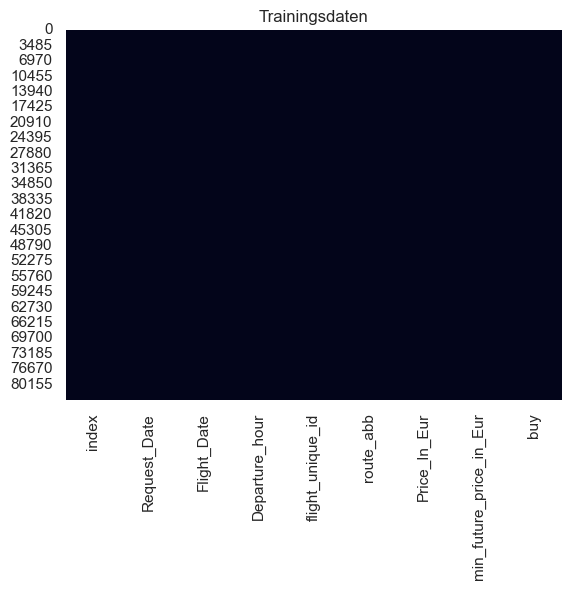

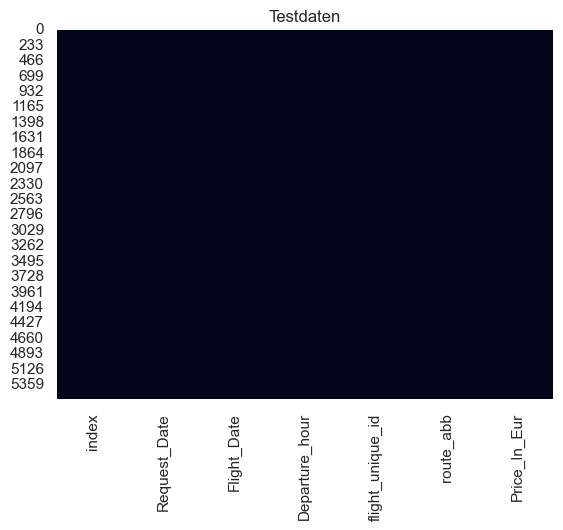

In [5]:
#Visualisieruung zur Darstellung von Null-Werten

def nullWerteVis(daten, datentyp):
    sns.heatmap(daten.isnull(), cbar=False)
    plt.title(datentyp)
    plt.show()
    
nullWerteVis(Flug_df,'Trainingsdaten')
nullWerteVis(Flug_df_test,'Testdaten')

##### Aus der Ausgabe ist  zu sehen, dass keine Spalte "Null-Werte" enthält. wenn denn hätten wir in der Grafik weiße Stellen gehabt. Mit Null-Werten sind fehlende Werte gemeint.
##### Nachfolgend werden die Wertebereiche für die numerische Spalten mit Boxplots veranschaulicht 

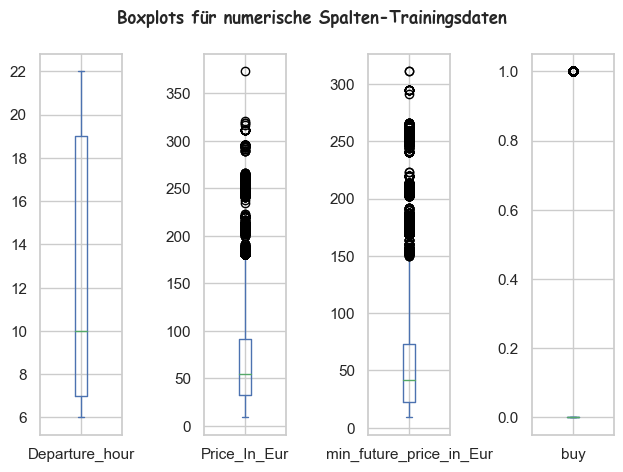

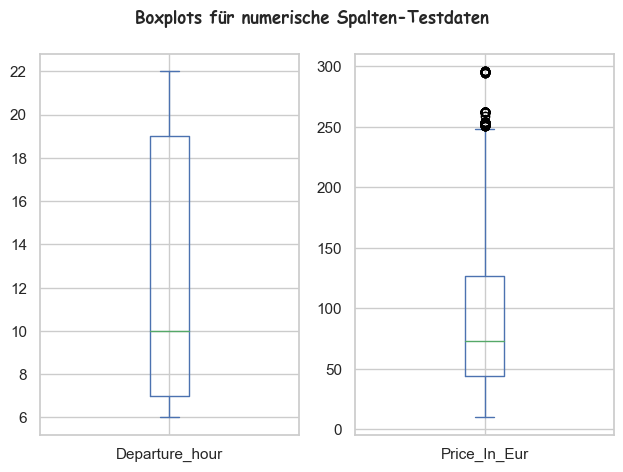

In [6]:

font = font_manager.FontProperties(family='Comic Sans MS',
                                   weight='bold',
                                   style='normal', size=12)
def Num_Spalten_visuals(dataframe, datentyp):
    
    cols = dataframe.columns
    new_col = []
    for col in cols:
        if (dataframe[col].dtypes == 'int64' or dataframe[col].dtypes == 'float64') and (col != 'index'):
            new_col.append(col)
    dataframe[new_col].plot(subplots=True,kind='box')
    plt.suptitle('Boxplots für numerische Spalten'+ datentyp,fontproperties=font)
    plt.tight_layout()
    plt.show()    

Num_Spalten_visuals(Flug_df,'-Trainingsdaten')
Num_Spalten_visuals(Flug_df_test,'-Testdaten')



##### Aus dem obigen Diagramm können wir ableiten, dass dieSpalten "Price_in_Eur" und "min_future_price_in_Eur" Ausreißer enthalten. Die Ausreißer liegen in Trainingsdaten liegen nach dem Wert "150" für min_future_price_in_Eur und nach ca "180" für Price_In_Eur".
##### Die Abflüge finden von 6 Uhr bis 22 Uhr statt. Für alle Abfragen gilt: Der günstigste Flug kostet 8,99 € und der teuerste 372,96

In [7]:
# Ermitteln wir die Zählwerte der Daten, die diesen Ausreißern in jedem Merkmal in Trainingsdaten entsprechen

print (f"'Price' feature Outliers:\n{Flug_df[Flug_df['Price_In_Eur']>180].count()}'\n'")
print (f"\n\n'min_future_price' feature Outliers:\n{Flug_df[Flug_df['min_future_price_in_Eur']>150].count()}'\n'")

'Price' feature Outliers:
index                      4881
Request_Date               4881
Flight_Date                4881
Departure_hour             4881
flight_unique_id           4881
route_abb                  4881
Price_In_Eur               4881
min_future_price_in_Eur    4881
buy                        4881
dtype: int64'
'


'min_future_price' feature Outliers:
index                      4300
Request_Date               4300
Flight_Date                4300
Departure_hour             4300
flight_unique_id           4300
route_abb                  4300
Price_In_Eur               4300
min_future_price_in_Eur    4300
buy                        4300
dtype: int64'
'


##### Wir stellen fest, dass es in jedem Merkmal nur 4881 Beobachtungen gibt, die den Ausreißer-Beobachtungen des Merkmals "Price" entsprechen und 4300 die des Merkmals "min_future_price_in_Eur"; wir wollen nun den Prozentsatz dieser Beobachtungen (Zeilen) ermitteln:

In [8]:
print("'Price'", round(4881/Flug_df.shape[0]*100,2),"Prozent")
print("'min_future_price'",round(4300/Flug_df.shape[0]*100,2),"Prozent")

'Price' 5.84 Prozent
'min_future_price' 5.14 Prozent


### Datentypkonvertierung

##### Wenn wir die Daten, die in den Spalten vorkommen mit ihren Datentypen vergleichen,stellt man fest, dass einige Feautures nicht der richtige Datentyp haben.Zum Beispiel 'Buy' hier ist die vorherzusagende Klasse, deswegen sollte der Feature vom Datentyp 'Category'sein. 
##### Die Feautures 'Request_Date'und 'Flight_Date' sollten vom Datentyp 'datetime' sein. Der Feature 'Request_Date' ist im UTC-Format gespeichert, Deswegen muss er erstmal in Localen Format umkonvertiert werden.

In [9]:
#Funktionen für die Datenkonvertierung

def Spalten_Konvertierung(dataset):
    dataset['buy']= dataset['buy'].astype('category')
    dataset['Flight_Date']= pd.to_datetime(dataset['Flight_Date'])

def local_time(row):
    if row['route_abb'].split('-')[0] == 'SXF' or row['route_abb'].split('-')[0] == 'FRA':
        # Zeitzone
        zone = "Europe/Berlin"
    else:
        # Zeitzone
        zone = "Europe/London"
    
    # Konvertierung in ein datetime-Objekt
    dtUTC = datetime.strptime(row['Request_Date'], '%Y-%m-%dT%H:%M:%SZ')
    dtZone = dtUTC.replace(tzinfo=tz.gettz('UTC')).astimezone(tz.gettz(zone))
    
    # Formatierung des DateTime-Strings ohne Zeitzonen-Offset-Information
    dtString = dtZone.strftime('%Y-%m-%d %H:%M:%S')
    
    # Rückgabe des konvertierten Werts
    return pd.to_datetime(dtString)

# Anwendung der Funktion auf die Spalte 'Request_Date'
Flug_df['Request_Date'] = Flug_df.apply( local_time, axis=1)

# Anwendung der Funktion auf der Dataframe'
Spalten_Konvertierung(Flug_df)    

    
print(f"Datentyp von Features nach Konvertierung \n\n{Flug_df_test.dtypes}")




Datentyp von Features nach Konvertierung 

index                 int64
Request_Date         object
Flight_Date          object
Departure_hour        int64
flight_unique_id     object
route_abb            object
Price_In_Eur        float64
dtype: object


In [10]:
# Anwendung der Funktion auf die Spalte 'Request_Date'
Flug_df_test['Request_Date'] = Flug_df_test.apply( local_time, axis=1)

In [11]:
Flug_df_test['Flight_Date']= pd.to_datetime(Flug_df_test['Flight_Date']) 
print(f"Datentyp von Features nach Konvertierung \n\n{Flug_df_test.dtypes}")

Datentyp von Features nach Konvertierung 

index                        int64
Request_Date        datetime64[ns]
Flight_Date         datetime64[ns]
Departure_hour               int64
flight_unique_id            object
route_abb                   object
Price_In_Eur               float64
dtype: object


### Korrelationen

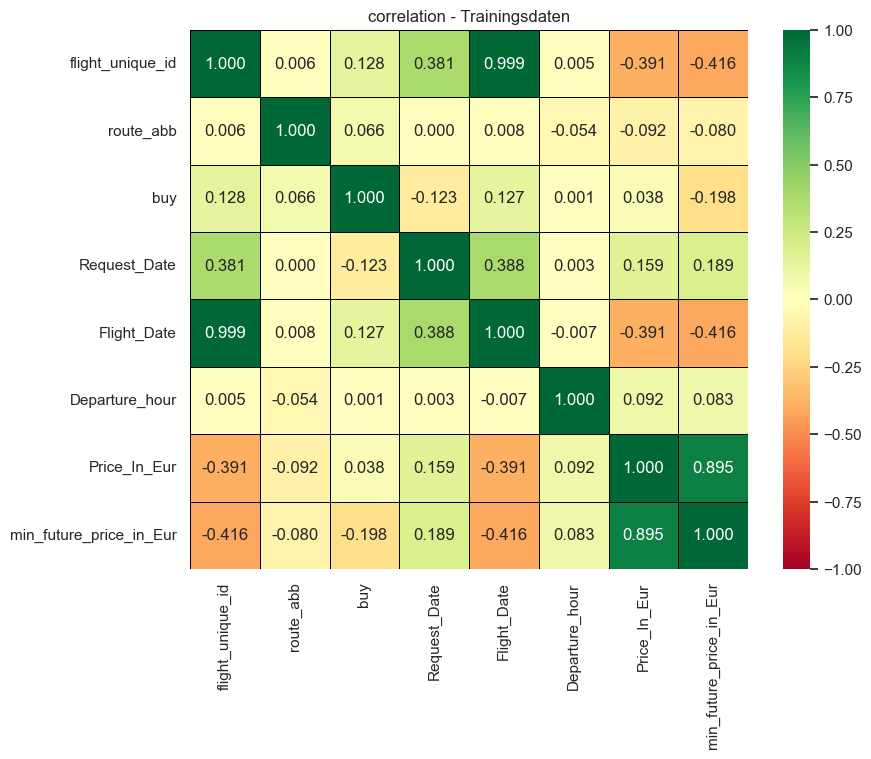

In [12]:
colcat = ['flight_unique_id', 'route_abb',  'buy','Request_Date','Flight_Date']
colnum = ['Departure_hour','Price_In_Eur','min_future_price_in_Eur']

#Erstellung numerischer Darstellungen von kategorialen Variablen in Trainingsdaten
df = Flug_df[colcat].apply(lambda x : pd.factorize(x)[0])
df= pd.concat([df,Flug_df[colnum]], axis=1) 

# Berechnung der Korrelationsmatrix
corrmat=df.corr(method='pearson')

# Visualisierung der Koorelationsmatrix
plt.figure(figsize=(9,7))
sns.heatmap(corrmat, annot=True,
            fmt='.3f',
            linecolor='black', linewidths=.5,
            cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title('correlation - Trainingsdaten')
plt.show()

## Explorative Analyse

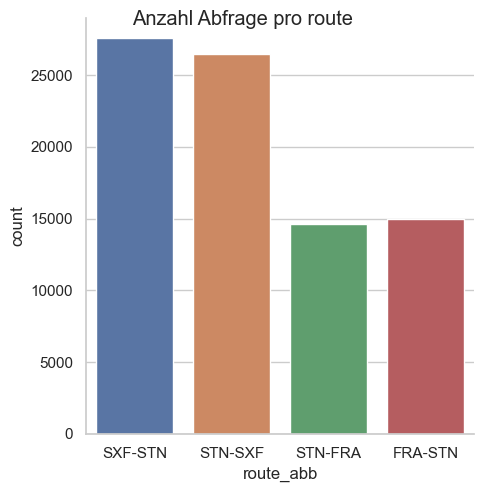

In [13]:
cp = sns.catplot(x='route_abb', data=Flug_df,kind='count')
cp.fig.suptitle('Anzahl Abfrage pro route')
plt.show()


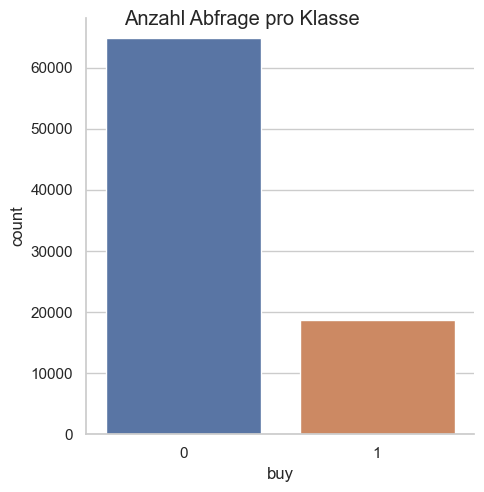

In [14]:
ck=sns.catplot(x='buy', data=Flug_df,kind='count')
ck.fig.suptitle('Anzahl Abfrage pro Klasse')
plt.show()

##### Dadurch stellt man fest das der Datensatz unbalanciert ist. Wir haben  64906 warten und nur 18718 kaufen. Was uns schon der Hinweis gibt dass, bei Aufteilen in Trainings- und Validierungsset Stratifizierung verwenden sollten.

In [15]:
route_SXF_STN = Flug_df.loc[Flug_df['route_abb'] =='SXF-STN', 'Price_In_Eur']
route_STN_SXF= Flug_df.loc[Flug_df['route_abb'] =='STN-SXF', 'Price_In_Eur']
route_STN_FRA = Flug_df.loc[Flug_df['route_abb'] =='STN-FRA', 'Price_In_Eur']
route_FRA_STN = Flug_df.loc[Flug_df['route_abb'] =='FRA-STN', 'Price_In_Eur']
print("Der Mittelpreis liegt bei {}".format(round(route_SXF_STN.mean(), 2)), "wenn man der Preis von Berlin nach London abfragt")
print("Der Mittelpreis liegt bei {}".format(round(route_STN_SXF.mean(), 2)), "wenn man der Preis von London nach Berlin  abfragt")
print("Der Mittelpreis liegt bei {}".format(round(route_STN_FRA.mean(), 2)), "wenn man der Preis von London nach Frankfurt  abfragt")
print("Der Mittelpreis liegt bei {}".format(round(route_FRA_STN.mean(), 2)), "wenn man der Preis von Frankfurt nach London abfragt")

Der Mittelpreis liegt bei 74.79 wenn man der Preis von Berlin nach London abfragt
Der Mittelpreis liegt bei 77.38 wenn man der Preis von London nach Berlin  abfragt
Der Mittelpreis liegt bei 67.57 wenn man der Preis von London nach Frankfurt  abfragt
Der Mittelpreis liegt bei 61.45 wenn man der Preis von Frankfurt nach London abfragt


##### Das würde bedeuten es ist güngstiger in Richtung London der Flugticket von Frankfurt zu buchen und für die Rückreise nach Deutschland ist es auch günstiger in Frankfurt zu landen. Das wird durch die untere Visualisierung veranschaulicht.

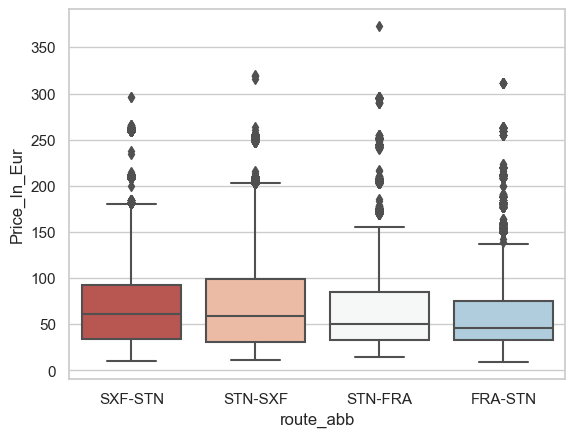

In [16]:
sns.boxplot(x = 'route_abb', y =Flug_df['Price_In_Eur'], data = Flug_df, palette = sns.color_palette('RdBu',5))
plt.show()

## Feature ingeneering

In [17]:
def generate_features(dataframe):
    #eine Reihe von Merkmalen unter Verwendung der Datumsspalten erstellen
    dataframe.loc[:,'Request_date'] = dataframe['Request_Date'].dt.date
    dataframe.loc[:,'Request_time'] = dataframe['Request_Date'].dt.time
    dataframe.loc[:,'days_diff'] = (pd.to_datetime(dataframe['Flight_Date'])- pd.to_datetime(dataframe['Request_date'])).dt.days
    #dataframe.loc[:,'flight_Date'] = dataframe['Flight_Date'].dt.dayofweek
    #dataframe.loc[:,'month'] = dataframe['Flight_Date'].dt.month
    #dataframe.loc[:,'weekofyear'] = dataframe['Flight_Date'].dt.isocalendar().week
    
    # Umrechnung der Departure_hour in Vormittag/Nachmittag/Abend usw.
    s = (dataframe["Departure_hour"] % 24 + 4) // 4 #give numbers from 1 to 6 #(return a series)
    # Werte ersetzen 1:latenight to 6: night
    s.replace({1: 'Late Night', 2: 'Early Morning', 3: 'Morning', 
                      4: 'Afternoon', 5: 'Evening', 6: 'Night'} ,inplace = True) 
    dataframe["departure_time"] = s
    dataframe['source'] =''
    dataframe['destination'] =''

    #Die Merkmales source und destination aus dem Spalten route_abb erstellen
    unique_routes = dataframe['route_abb'].unique()
    for route in unique_routes:
        if route == 'SXF-STN':
            dataframe.loc[dataframe['route_abb'] == route, 'source'] = 'Berlin'
            dataframe.loc[dataframe['route_abb'] == route, 'destination'] = 'London'
        elif route == 'STN-SXF':  # Weitere Ausprägungen hinzufügen
            dataframe.loc[dataframe['route_abb'] == route, 'source'] = 'London'
            dataframe.loc[dataframe['route_abb'] == route, 'destination'] = 'Berlin'
        elif route == 'STN-FRA':  # Weitere Ausprägungen hinzufügen
            dataframe.loc[dataframe['route_abb'] == route, 'source'] = 'London'
            dataframe.loc[dataframe['route_abb'] == route, 'destination'] = 'Frankfurt'
        elif route == 'FRA-STN':  # Weitere Ausprägungen hinzufügen
            dataframe.loc[dataframe['route_abb'] == route, 'source'] = 'Frankfurt'
            dataframe.loc[dataframe['route_abb'] == route, 'destination'] = 'London'
     
 
            
generate_features(Flug_df)

In [18]:
def agg_Dataframe(df):
 # eine Reihe von Merkmalen unter Verwendung der Datumsspalte erstellen
    df['year'] = df['Flight_Date'].dt.year
    df['weekofyear'] = df['Flight_Date'].dt.isocalendar().week
    df['month'] = df['Flight_Date'].dt.month
    df['dayofweek'] = df['Flight_Date'].dt.dayofweek
    df['weekend'] = (df['Flight_Date'].dt.weekday >=5).astype(int)
 
 # ein aggregate dictionary erstellen
    aggs = {}
 # for aggregation by month, we calculate the
 # number of unique month values and also the mean
    #aggs['month'] = ['nunique', 'mean']
    #aggs['weekofyear'] = ['nunique', 'mean']
 # nach Price_In_Eur und die Aggregate sum, max, min 
 # and mean für den Merkmal berechnen
    aggs['Price_In_Eur'] = ['sum','max','min','mean']
    aggs['Request_Date'] = ['size']
    
 # nach flight_unique_id gruppieren und die Aggregate berechnen
    agg_df = df.groupby('flight_unique_id').agg(aggs)

 # flatten the column names
    agg_df.columns = ['_'.join(col).strip() for col in agg_df.columns.values]
    
# index zurücksetzen
    agg_df = agg_df.reset_index()
    
# aggregierte Dataframe zurückgeben    
    return agg_df

In [24]:
Flug_df_agg = agg_Dataframe(Flug_df)

# Trainingsdaten und aggregierte Dataframe verknüpfen
Trainingsdaten = Flug_df_agg.merge(Flug_df, how='left',on='flight_unique_id')


In [25]:
Trainingsdaten.drop(columns=['index','Request_Date','Flight_Date','route_abb','Departure_hour'],axis=1,inplace=True)

In [26]:
Trainingsdaten

,flight_unique_id,Price_In_Eur_sum,Price_In_Eur_max,Price_In_Eur_min,Price_In_Eur_mean,Request_Date_size,Price_In_Eur,min_future_price_in_Eur,buy,Request_date,Request_time,days_diff,departure_time,source,destination,year,weekofyear,month,dayofweek,weekend
0,2019-06-05 FR 146,985.28,259.07,208.07,246.320000,4,208.07,259.07,1,2019-06-03,13:00:00,2,Evening,Berlin,London,2019,23,6,2,0
1,2019-06-05 FR 146,985.28,259.07,208.07,246.320000,4,259.07,259.07,1,2019-06-04,01:00:00,1,Evening,Berlin,London,2019,23,6,2,0
2,2019-06-05 FR 146,985.28,259.07,208.07,246.320000,4,259.07,259.07,1,2019-06-04,13:00:00,1,Evening,Berlin,London,2019,23,6,2,0
3,2019-06-05 FR 146,985.28,259.07,208.07,246.320000,4,259.07,259.07,1,2019-06-05,01:00:00,0,Evening,Berlin,London,2019,23,6,2,0
4,2019-06-05 FR 147,899.36,252.06,143.86,224.840000,4,143.86,251.72,1,2019-06-03,12:00:00,2,Night,London,Berlin,2019,23,6,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83619,2019-09-10 FR 8543,3166.64,54.99,9.99,25.745041,123,35.69,39.69,1,2019-08-01,13:00:00,40,Morning,Berlin,London,2019,37,9,1,0
83620,2019-09-10 FR 8543,3166.64,54.99,9.99,25.745041,123,46.83,39.69,0,2019-08-02,01:00:00,39,Morning,Berlin,London,2019,37,9,1,0
83621,2019-09-10 FR 8543,3166.64,54.99,9.99,25.745041,123,46.83,39.69,0,2019-08-02,13:00:00,39,Morning,Berlin,London,2019,37,9,1,0
83622,2019-09-10 FR 8543,3166.64,54.99,9.99,25.745041,123,39.69,39.69,1,2019-08-03,01:00:00,38,Morning,Berlin,London,2019,37,9,1,0
